<a href="https://colab.research.google.com/github/aaril011/Praktikum-MachineLearning/blob/main/TUGASMODUL4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Menampilkan 10 baris pertama data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Menampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Menampilkan ringkasan statistik dataset
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

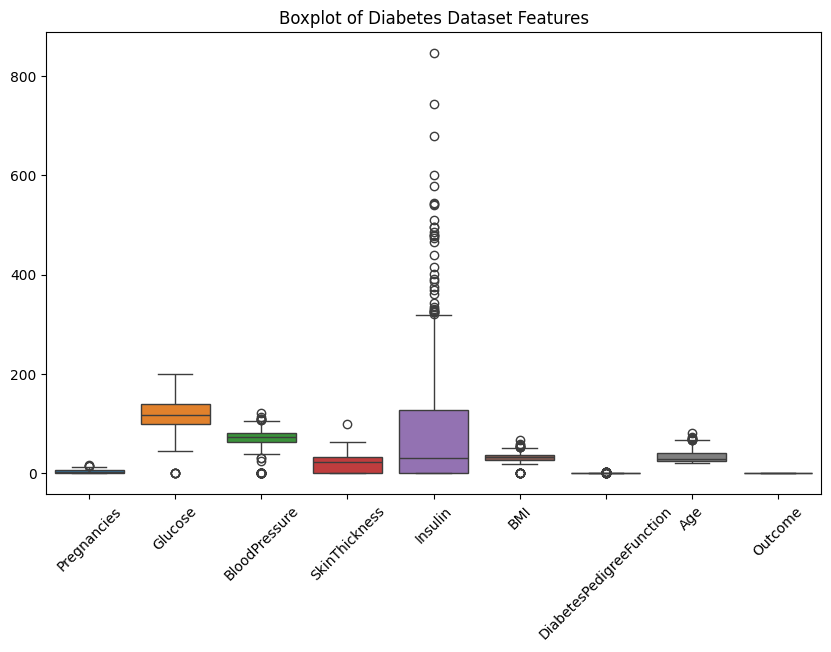

In [ ]:
# Boxplot untuk visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Diabetes Dataset Features')
plt.xticks(rotation=45)
plt.show()

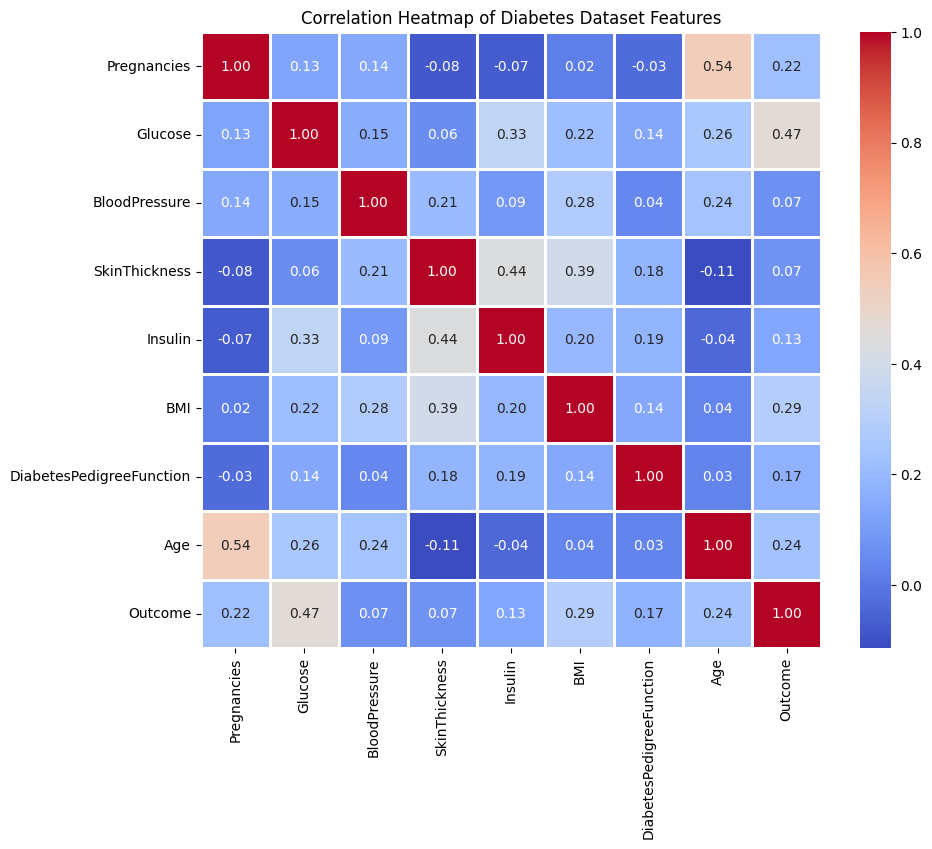

In [ ]:
# Heatmap korelasi fitur dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Diabetes Dataset Features')
plt.show()

In [ ]:
# Memisahkan fitur dan label
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Pembagian data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Penskalaan fitur menggunakan StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Pencarian nilai K terbaik
k_values = [3, 5, 7, 9, 11]
best_accuracy = 0
best_k = None

In [ ]:
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

In [ ]:
print("Best K:", best_k)
print("Best Accuracy:", best_accuracy)

Best K: 3
Best Accuracy: 0.7077922077922078


In [ ]:
# Membuat model menggunakan nilai K terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Melakukan prediksi menggunakan data uji
y_pred_best = best_knn_model.predict(x_test)

In [ ]:
# Menampilkan hasil evaluasi
print("\nClassification Report (Best K):")
print(classification_report(y_test, y_pred_best))


Classification Report (Best K):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



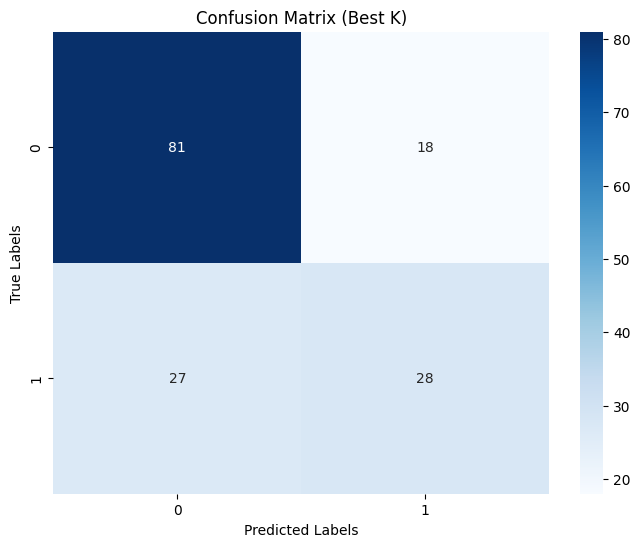

In [ ]:
# Menampilkan confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Best K)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Data baru untuk prediksi
jml_hamil = 0.05
glukosa = -0.05
Tknn_Drh = 0.1
Tbl_Kulit = -0.2
Insulin = 0.15
IMB = -0.25
Riwyt_diabet = 0
usia = -0.35

new_data = np.array([jml_hamil, glukosa, Tknn_Drh, Tbl_Kulit, Insulin, IMB, Riwyt_diabet, usia])
new_data = new_data.reshape(1, -1)

# Melakukan prediksi untuk data baru menggunakan nilai K terbaik
predicted_label_best = best_knn_model.predict(new_data)
if predicted_label_best == 1:
    print("Menderita diabetes.")
elif predicted_label_best == 0:
    print("Bukan Penderita diabetes.")
else:
    print("Hasil prediksi tidak valid.")

Bukan Penderita diabetes.
